The following code are some dependencies my teammate Krishna provided us early on in the project development.

She helped clean the dataset, and created a baseline for us to pursue our individual questions.

In [1]:
# Load the dataset and preprocess it
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
from matplotlib import pyplot as plt
import scipy.stats as st

In [2]:
# Load the dataset
terror = pd.read_csv('Resources/Terrorism_Dataset.csv', encoding='ISO-8859-1', low_memory=False)
terror.head()

,iyear,imonth,iday,country,region_txt,city,latitude,longitude,attacktype1_txt,targtype1_txt,target1,gname,motive,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,NaN,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Employee,Unknown,NaN,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,NaN,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,NaN,Incendiary,NaN,NaN


In [3]:
# Rename columns for better readability
terror.rename(columns={
    'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country': 'Country', 
    'region_txt': 'Region', 'attacktype1_txt': 'AttackType', 'target1': 'Target', 
    'nkill': 'Killed', 'nwound': 'Wounded', 'gname': 'Group', 
    'targtype1_txt': 'Target_type', 'weaptype1_txt': 'Weapon_type', 'motive': 'Motive'
}, inplace=True)

In [4]:
# Select relevant columns
terror = terror[['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude', 'longitude', 
                 'AttackType', 'Killed', 'Wounded', 'Target', 'Group', 'Target_type', 
                 'Weapon_type', 'Motive']]
terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN


In [5]:
# Step 1: Load the tourism dataset
tourism = pd.read_csv('Resources/tourism.csv')

# Renaming the 'Country' column to "Country"
tourism.rename(columns={'country': 'Country'}, inplace=True)


In [6]:
# Step 2: Merge the tourism dataset with the terrorism dataset on the 'Country' column
merged_data = pd.merge(terror, tourism, on='Country', how='left')

In [7]:
# Step 3: Clean up the merged dataset
# Check for missing values
print("Missing values in merged dataset:")
print(merged_data.isnull().sum())

Missing values in merged dataset:
Year                         0
Month                        0
Day                          0
Country                      0
Region                       0
city                       435
latitude                  4556
longitude                 4557
AttackType                   0
Killed                   10313
Wounded                  16311
Target                     638
Group                        0
Target_type                  0
Weapon_type                  0
Motive                  131130
tourists_in_millions    152117
receipts_in_billions    152117
receipts_per_tourist    152117
percentage_of_gdp       152117
dtype: int64


In [8]:
# Remove rows with missing values in 'tourists_in_millions' column
merged_data.dropna(subset=['tourists_in_millions'], inplace=True)

In [9]:
merged_data.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN,51.1,11.45,224.0,0.9
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN,1.5,2.77,1867.0,0.7
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN,7.4,6.19,836.0,2.9
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN,4.1,11.40,2769.0,0.2
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,45.0,84.21,1870.0,0.4


## **Question 3.**
### **Are there typical characteristics of countries with high/low terrorism?**

For the characteristics of a country, we could look at various angles:
- region (or hemisphere)
- population of country
- how many tourists
- receipts of country (tourism income)

Since our database did not contain population data, and we were restricted on time, I had to abandon that avenue.

Ultimately, I decided to look at how many tourists a country gets, and compare it to the incidents of terrorism in that country, to see if there was any correlation between these two.

In [10]:
# Step 4: Analyze the impact of terrorism on tourism
# Group by country and calculate the total number of terrorist incidents and total tourists
tourism_impact = merged_data.groupby('Country').agg({'Year': 'count', 'tourists_in_millions': 'mean'}).reset_index()
tourism_impact.rename(columns={'Year': 'Total_Incidents'}, inplace=True)

In [11]:
tourism_impact.head()

,Country,Total_Incidents,tourists_in_millions
0,Albania,80,2.7
1,Australia,114,1.8
2,Austria,115,15.1
3,Belarus,13,3.6
4,Belgium,154,2.6


In [12]:
# Grouping by country.
tourism_impact = tourism.groupby('Country')['tourists_in_millions'].mean().reset_index()

In [13]:
# Finding the country with the most tourists:
most_tourists_index = tourism_impact.idxmax().iloc[1]
most_tourists_index
most_tourists = tourism_impact.iloc[most_tourists_index]
country_most_tourists = most_tourists['Country']
country_num_tourists_most = most_tourists['tourists_in_millions']

print(f"The country with the most tourism is {country_most_tourists} at {country_num_tourists_most} million tourists.")

The country with the most tourism is France at 117.1 million tourists.


In [14]:

# Finding the country with the least tourists:
least_tourists_index = tourism_impact.idxmin().iloc[1]

least_tourists = tourism_impact.iloc[least_tourists_index]
country_least_tourists = least_tourists['Country']
country_num_tourists_least = least_tourists['tourists_in_millions']

if country_num_tourists_least < 0.1:
    print(f"The country with the least tourism is {country_least_tourists} at less than a million tourists.")
else:
    print(f"The country with the least tourism is {country_least_tourists} at {country_num_tourists_least} million tourists.")

The country with the least tourism is Moldova at less than a million tourists.


Now that we have the data on which countries have high and low tourism, let's plot it for easy visualization.

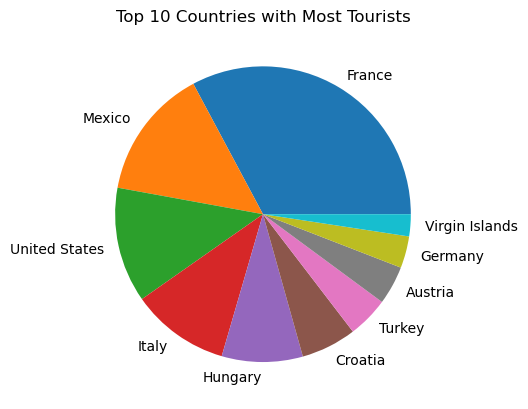

In [15]:
# Making a chart for most tourists
tourism_impact.head()
tourism_df_top_10 = tourism_impact.nlargest(10, 'tourists_in_millions')

plt.pie(tourism_df_top_10['tourists_in_millions'], labels=tourism_df_top_10['Country'])

plt.title('Top 10 Countries with Most Tourists')
plt.show()

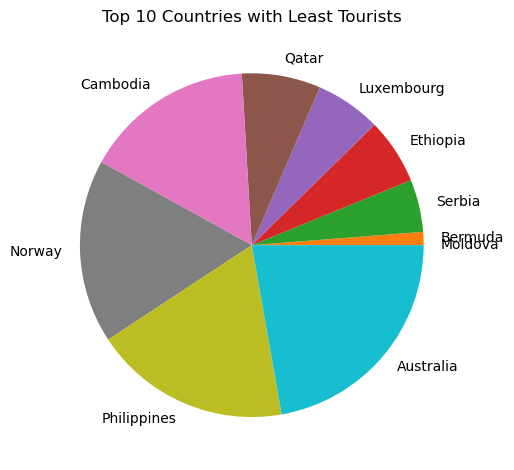

In [16]:
# Making a chart for least tourists
tourism_impact.head()
tourism_df_bottom_10 = tourism_impact.nsmallest(10, 'tourists_in_millions')

plt.pie(tourism_df_bottom_10['tourists_in_millions'], labels=tourism_df_bottom_10['Country'])

# plt.bar(tourism_df_top_10['Country'], tourism_df_top_10['tourists_in_millions'])
plt.title('Top 10 Countries with Least Tourists')
plt.tight_layout()
plt.show()

The following charts (for tourism receipts) were not used in the final presentation, but I left them in for future consideration. The original thought was if I do not have access to population data, I could look at the characteristic of wealth via tourism for each country instead.

In [17]:
# Creating a database for countries with their tourist receipts:
# i.e. Which countries make the most income from tourism?

tourism_receipt_df = merged_data.groupby('Country').agg({'receipts_in_billions': 'mean'}).reset_index()
tourism_receipt_df.head()

,Country,receipts_in_billions
0,Albania,1.24
1,Australia,26.23
2,Austria,15.36
3,Belarus,0.54
4,Belgium,7.45


In [18]:
#Finding the 10 countries with the largest tourism receipts.
tourism_receipt_df_top_10 = tourism_receipt_df.nlargest(10, 'receipts_in_billions')
tourism_receipt_df_top_10

,Country,receipts_in_billions
35,United States,84.21
10,Germany,58.37
9,France,35.96
12,Hong Kong,32.70
1,Australia,26.23
34,United Arab Emirates,24.62
15,Italy,20.46
2,Austria,15.36
26,Qatar,14.32
32,Turkey,13.77


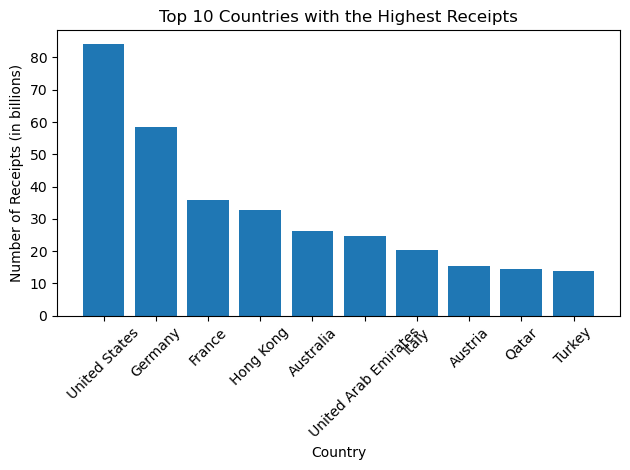

In [19]:
plt.bar(tourism_receipt_df_top_10['Country'], tourism_receipt_df_top_10['receipts_in_billions'])
plt.title('Top 10 Countries with the Highest Receipts')
plt.xlabel('Country')
plt.ylabel('Number of Receipts (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
#Finding the 10 countries with the smallest tourism receipts.
tourism_receipt_df_bottom_10 = tourism_receipt_df.nsmallest(10, 'receipts_in_billions')
tourism_receipt_df_bottom_10

,Country,receipts_in_billions
20,Moldova,0.35
3,Belarus,0.54
33,Ukraine,0.69
6,Cambodia,1.12
0,Albania,1.24
29,Serbia,1.42
27,Romania,1.61
5,Bulgaria,1.79
23,Norway,2.20
8,Ethiopia,2.28


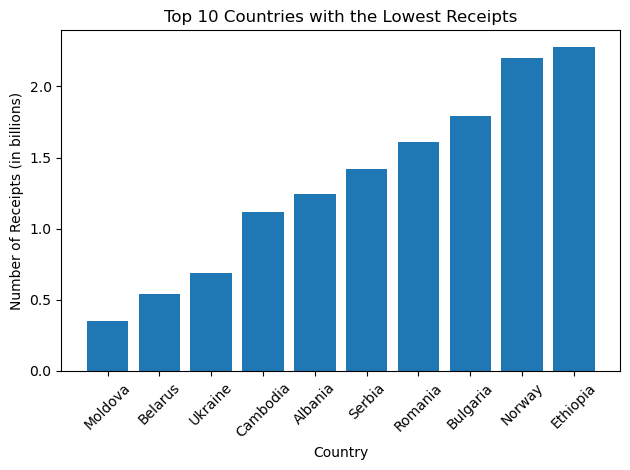

In [21]:
plt.bar(tourism_receipt_df_bottom_10['Country'], tourism_receipt_df_bottom_10['receipts_in_billions'])
plt.title('Top 10 Countries with the Lowest Receipts')
plt.xlabel('Country')
plt.ylabel('Number of Receipts (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Taking the top ten countries in the respective ranking for tourism, let's compare it to the data we have on terrorism.

In [22]:
# We have to compare these countries with high tourism to their terrorism ranking.

tourism_v_terrorism_df = merged_data.groupby('Country').agg({'Year': 'count', 'tourists_in_millions': 'mean'}).reset_index()
tourism_v_terrorism_df.rename(columns={'Year': 'Total Incidents', 'tourists_in_millions': 'Tourists (in millions)'}, inplace=True)
tourism_v_terrorism_df = tourism_v_terrorism_df.set_index('Country')
tourism_v_terrorism_df

,Total Incidents,Tourists (in millions)
Country,,
Albania,80,2.7
Australia,114,1.8
Austria,115,15.1
Belarus,13,3.6
Belgium,154,2.6
Bulgaria,52,5.0
Cambodia,259,1.3
Croatia,57,21.6
Ethiopia,190,0.5


With the dataframe set up, we can now plot a scatterplot and compute the correlation to help illustrate the story behind the data.

In [23]:
tourism_df_top_10['Country']

10            France
21            Mexico
38     United States
16             Italy
14           Hungary
8            Croatia
35            Turkey
2            Austria
11           Germany
40    Virgin Islands
Name: Country, dtype: object

The correlation between the number of terrorist incidents and the number of tourists is 0.28.


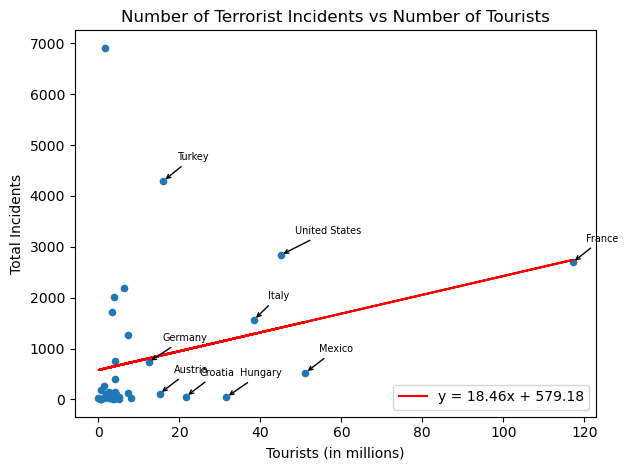

In [24]:
countries = tourism_v_terrorism_df.index
top_ten_list = list(tourism_df_top_10['Country'])

t_v_t_scatter = tourism_v_terrorism_df.plot.scatter(x='Tourists (in millions)', y='Total Incidents')
for idx, row in tourism_v_terrorism_df.iterrows():
    if row.name in top_ten_list:
        t_v_t_scatter.annotate(row.name, (row['Tourists (in millions)'], row['Total Incidents']), xytext=(10,15),
                textcoords='offset points', family='sans-serif', fontsize=7, arrowprops={'arrowstyle': '->'})

t_v_t_scatter.set_title('Number of Terrorist Incidents vs Number of Tourists')


x = tourism_v_terrorism_df['Tourists (in millions)']
y = tourism_v_terrorism_df['Total Incidents']

# Calculate the correlation coefficient between the number of terrorist incidents and the number of tourists.
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"The correlation between the number of terrorist incidents and the number of tourists is {round(correlation[0],2)}.")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.plot(x, regress_values,"r", label=line_eq)
plt.legend(loc='lower right')
plt.tight_layout()

### **Final Analysis:**

The goal was to identify countries and regions that have the highest and lowest number of tourists from our dataset on tourism from 2022, and then compare this data to the incidents of terrorism from the years 1970 to 2017. The following is the summary of findings:

- The country with the highest number of tourists is France at 117.1 million tourists.
- The country with the lowest number of tourists is Moldova at less than a million tourists (0.0 million).
- The countries with the highest tourism seem to vary, but generally, can be located in North America or Western Europe. Conversely, the countries with the lowest tourism are typically from Eastern Europe and the Middle East.
- Looking at the correlation between the number of tourists a country gets, and the number of incidents of terrorism a country gets, there was a correlation coefficient of 0.28.
- This indicates a weak, but positive, correlation. There is somewhat of a link between the two, but it is not a strong relationship.
- In broad terms, this means there is little evidence that the more tourists a country has, the more likely it will be a target of terrorism.

The implications of such findings are as follows:

- While this analysis is far from all-encompassing on a topic as complex and multi-faceted as Terrorism, it does help provide some insight on the behaviours around terrorism. These findings indicate that terrorists do not appear to specifically target tourists, but further research would be needed to definitively conclude which variables terrorists *do* target.
- Comparing the data on which regions have the highest terrorism rates to which countries are most visited by tourists, you can see tourists generally stay clear of regions with high terrorism (the Middle East, South Asia), as well as regions with significantly less terrorism (Eastern Europe), but, paradoxically, continue to travel to regions with some terrorism (Western Europe). The motives behind this pattern is unclear without further research, but is interesting to note.

In conclusion, while more information is needed to make a firm conclusion on the relationship between Terrorism and Tourism, it does appear that, using tourism as one characteristic of a country, there does not seem to be a strong relationship between the two. The characteristic of a country can be defined in many ways, however, and thus, more research would be needed to conclude if further links can be made. 